In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('churn_data.csv')

In [4]:
df.head()

customerID  tenure PhoneService        Contract PaperlessBilling  \
0  7590-VHVEG       1           No  Month-to-month              Yes   
1  5575-GNVDE      34          Yes        One year               No   
2  3668-QPYBK       2          Yes  Month-to-month              Yes   
3  7795-CFOCW      45           No        One year               No   
4  9237-HQITU       2          Yes  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges TotalCharges Churn  
0           Electronic check           29.85        29.85    No  
1               Mailed check           56.95       1889.5    No  
2               Mailed check           53.85       108.15   Yes  
3  Bank transfer (automatic)           42.30      1840.75    No  
4           Electronic check           70.70       151.65   Yes

In [5]:
df.shape

(7043, 9)

In [6]:
df.describe()

tenure  MonthlyCharges
count  7043.000000     7043.000000
mean     32.371149       64.761692
std      24.559481       30.090047
min       0.000000       18.250000
25%       9.000000       35.500000
50%      29.000000       70.350000
75%      55.000000       89.850000
max      72.000000      118.750000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 495.3+ KB


In [8]:
df.isnull()

customerID  tenure  PhoneService  Contract  PaperlessBilling  \
0          False   False         False     False             False   
1          False   False         False     False             False   
2          False   False         False     False             False   
3          False   False         False     False             False   
4          False   False         False     False             False   
...          ...     ...           ...       ...               ...   
7038       False   False         False     False             False   
7039       False   False         False     False             False   
7040       False   False         False     False             False   
7041       False   False         False     False             False   
7042       False   False         False     False             False   

      PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0             False           False         False  False  
1             False           False         False  False  
2             False           False         False  False  
3             False           False         False  False  
4             False           False         False  False  
...             ...             ...           ...    ...  
7038          False           False         False  False  
7039          False           False         False  False  
7040          False           False         False  False  
7041          False           False         False  False  
7042          False           False         False  False  

[7043 rows x 9 columns]

In [9]:
df.isnull().sum()

customerID          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
np.round(((df.isnull().sum()/len(df))*100).sort_values(ascending = False),2)

customerID          0.0
tenure              0.0
PhoneService        0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [11]:
df.dtypes

customerID           object
tenure                int64
PhoneService         object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [12]:
df['tenure'] = df['tenure'].astype(float)

In [13]:
#df['PhoneService'] = df['PhoneService'].astype(float)

In [14]:
df['MonthlyCharges'] = df['MonthlyCharges'].astype(float)

In [15]:
df.dtypes

customerID           object
tenure              float64
PhoneService         object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# Check Outliers

In [16]:
df.skew()

tenure            0.239540
MonthlyCharges   -0.220524
dtype: float64

- There is no Outliers.

In [17]:
num = list(df.select_dtypes(include=['int64', 'float64']).keys())

cat = list(df.select_dtypes(include='O').keys())

In [18]:
num

['tenure', 'MonthlyCharges']

In [19]:
cat

['customerID',
 'PhoneService',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

# Byvariet Analysis

## Scatter Plot

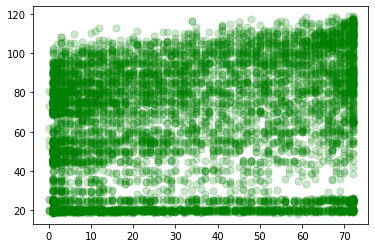

In [20]:
plt.scatter(df.tenure, df.MonthlyCharges, alpha = 0.2, s = 50, c = 'green')
plt.show()

## Joint Plot

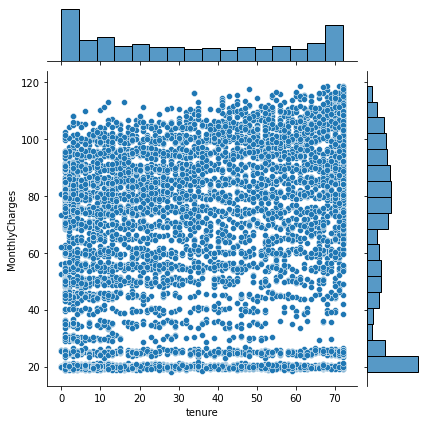

In [21]:
sns.jointplot(df.tenure, df.MonthlyCharges)
plt.show()

## Side by Side BoxPlot

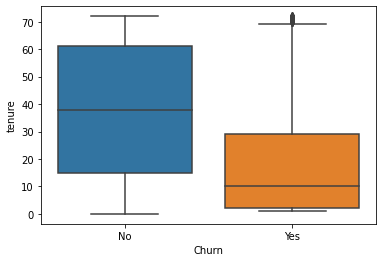

In [22]:
## one numeric and one category

sns.boxplot(data = df, x = 'Churn', y = 'tenure')
plt.show()

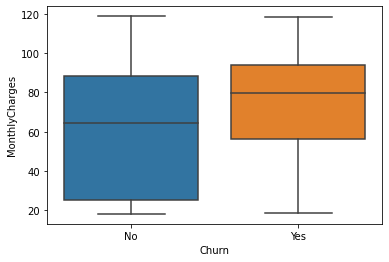

In [23]:
sns.boxplot(data = df, x = 'Churn', y = 'MonthlyCharges')
plt.show()

## Pairplot

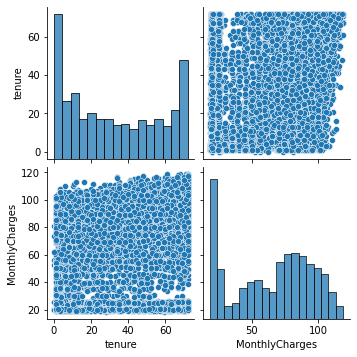

In [24]:
sns.pairplot(df)
plt.show()

# Heat Map

In [25]:
cor = df.corr()

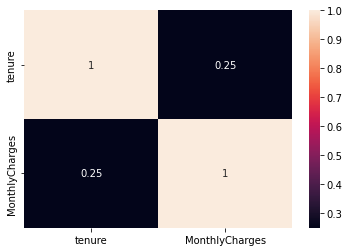

In [26]:
sns.heatmap(cor, annot = True)
plt.show()

In [27]:
df. drop(['customerID'], axis = 1 , inplace = True) # drop customer ID

In [28]:
df

tenure PhoneService        Contract PaperlessBilling  \
0        1.0           No  Month-to-month              Yes   
1       34.0          Yes        One year               No   
2        2.0          Yes  Month-to-month              Yes   
3       45.0           No        One year               No   
4        2.0          Yes  Month-to-month              Yes   
...      ...          ...             ...              ...   
7038    24.0          Yes        One year              Yes   
7039    72.0          Yes        One year              Yes   
7040    11.0           No  Month-to-month              Yes   
7041     4.0          Yes  Month-to-month              Yes   
7042    66.0          Yes        Two year              Yes   

                  PaymentMethod  MonthlyCharges TotalCharges Churn  
0              Electronic check           29.85        29.85    No  
1                  Mailed check           56.95       1889.5    No  
2                  Mailed check           53.85       108.15   Yes  
3     Bank transfer (automatic)           42.30      1840.75    No  
4              Electronic check           70.70       151.65   Yes  
...                         ...             ...          ...   ...  
7038               Mailed check           84.80       1990.5    No  
7039    Credit card (automatic)          103.20       7362.9    No  
7040           Electronic check           29.60       346.45    No  
7041               Mailed check           74.40        306.6   Yes  
7042  Bank transfer (automatic)          105.65       6844.5    No  

[7043 rows x 8 columns]

In [29]:
df[df["TotalCharges"] == " "]

tenure PhoneService  Contract PaperlessBilling  \
488      0.0           No  Two year              Yes   
753      0.0          Yes  Two year               No   
936      0.0          Yes  Two year               No   
1082     0.0          Yes  Two year               No   
1340     0.0           No  Two year               No   
3331     0.0          Yes  Two year               No   
3826     0.0          Yes  Two year               No   
4380     0.0          Yes  Two year               No   
5218     0.0          Yes  One year              Yes   
6670     0.0          Yes  Two year               No   
6754     0.0          Yes  Two year              Yes   

                  PaymentMethod  MonthlyCharges TotalCharges Churn  
488   Bank transfer (automatic)           52.55                 No  
753                Mailed check           20.25                 No  
936                Mailed check           80.85                 No  
1082               Mailed check           25.75                 No  
1340    Credit card (automatic)           56.05                 No  
3331               Mailed check           19.85                 No  
3826               Mailed check           25.35                 No  
4380               Mailed check           20.00                 No  
5218               Mailed check           19.70                 No  
6670               Mailed check           73.35                 No  
6754  Bank transfer (automatic)           61.90                 No

In [30]:
df['TotalCharges']= pd.to_numeric(df['TotalCharges'],errors = 'coerce')
df.isnull().sum()
print(df.shape)


(7043, 8)


In [31]:
df = df[df['TotalCharges'].notna()]
print(df.shape)

(7032, 8)


In [32]:
X = df.iloc[:,0:7]

In [33]:
X

tenure PhoneService        Contract PaperlessBilling  \
0        1.0           No  Month-to-month              Yes   
1       34.0          Yes        One year               No   
2        2.0          Yes  Month-to-month              Yes   
3       45.0           No        One year               No   
4        2.0          Yes  Month-to-month              Yes   
...      ...          ...             ...              ...   
7038    24.0          Yes        One year              Yes   
7039    72.0          Yes        One year              Yes   
7040    11.0           No  Month-to-month              Yes   
7041     4.0          Yes  Month-to-month              Yes   
7042    66.0          Yes        Two year              Yes   

                  PaymentMethod  MonthlyCharges  TotalCharges  
0              Electronic check           29.85         29.85  
1                  Mailed check           56.95       1889.50  
2                  Mailed check           53.85        108.15  
3     Bank transfer (automatic)           42.30       1840.75  
4              Electronic check           70.70        151.65  
...                         ...             ...           ...  
7038               Mailed check           84.80       1990.50  
7039    Credit card (automatic)          103.20       7362.90  
7040           Electronic check           29.60        346.45  
7041               Mailed check           74.40        306.60  
7042  Bank transfer (automatic)          105.65       6844.50  

[7032 rows x 7 columns]

In [34]:
y = df.iloc[:,-1]

In [35]:
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7032, dtype: object

## Data Spliting

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.80,test_size=0.20,random_state=42)

In [38]:
X_train.shape

(5625, 7)

In [39]:
X_test.shape

(1407, 7)

In [40]:
y_train

6030    Yes
3410    Yes
5483    Yes
5524     No
6337     No
       ... 
3778     No
5199     No
5235     No
5399     No
862     Yes
Name: Churn, Length: 5625, dtype: object

In [41]:
y_test

2481     No
6784     No
6125    Yes
3052     No
4099     No
       ... 
1733     No
5250     No
5465     No
5851     No
3984     No
Name: Churn, Length: 1407, dtype: object

# Label Encoding

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
le = LabelEncoder()

In [44]:
le.fit(y_train)

LabelEncoder()

In [45]:
y_train = le.transform(y_train)

In [46]:
y_test = le.transform(y_test)

In [47]:
y_train

array([1, 1, 1, ..., 0, 0, 1])

In [48]:
y_test

array([0, 0, 1, ..., 0, 0, 0])

In [49]:
le.classes_

array(['No', 'Yes'], dtype=object)

In [50]:
df

tenure PhoneService        Contract PaperlessBilling  \
0        1.0           No  Month-to-month              Yes   
1       34.0          Yes        One year               No   
2        2.0          Yes  Month-to-month              Yes   
3       45.0           No        One year               No   
4        2.0          Yes  Month-to-month              Yes   
...      ...          ...             ...              ...   
7038    24.0          Yes        One year              Yes   
7039    72.0          Yes        One year              Yes   
7040    11.0           No  Month-to-month              Yes   
7041     4.0          Yes  Month-to-month              Yes   
7042    66.0          Yes        Two year              Yes   

                  PaymentMethod  MonthlyCharges  TotalCharges Churn  
0              Electronic check           29.85         29.85    No  
1                  Mailed check           56.95       1889.50    No  
2                  Mailed check           53.85        108.15   Yes  
3     Bank transfer (automatic)           42.30       1840.75    No  
4              Electronic check           70.70        151.65   Yes  
...                         ...             ...           ...   ...  
7038               Mailed check           84.80       1990.50    No  
7039    Credit card (automatic)          103.20       7362.90    No  
7040           Electronic check           29.60        346.45    No  
7041               Mailed check           74.40        306.60   Yes  
7042  Bank transfer (automatic)          105.65       6844.50    No  

[7032 rows x 8 columns]

- It performs only Target Column.

## One Hot Encoding

- It performes on Nomonal Categorical Varibles.
- We have two nominal categorical columns named 'Contract' and 'PaymentMethod'

### Dummy : Payment Method

In [51]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

In [52]:
status = pd.get_dummies(df['PaymentMethod'])

In [53]:
status.sample(5)

Bank transfer (automatic)  Credit card (automatic)  Electronic check  \
1084                          0                        1                 0   
5487                          0                        0                 0   
2436                          0                        1                 0   
1548                          0                        0                 1   
47                            0                        0                 1   

      Mailed check  
1084             0  
5487             1  
2436             0  
1548             0  
47               0

In [54]:
status = pd.get_dummies(df['PaymentMethod'], drop_first = True)

In [55]:
df = pd.concat([df, status], axis = 1)

In [56]:
df.drop(['PaymentMethod'], axis = 1, inplace = True)

In [57]:
df.sample(5)

tenure PhoneService        Contract PaperlessBilling  MonthlyCharges  \
1530     2.0          Yes  Month-to-month               No           90.00   
66      47.0          Yes        One year              Yes           78.90   
6712    28.0          Yes  Month-to-month               No           85.45   
2577     1.0          Yes  Month-to-month              Yes           94.60   
71      52.0          Yes        One year              Yes           20.40   

      TotalCharges Churn  Credit card (automatic)  Electronic check  \
1530        190.05   Yes                        1                 0   
66         3650.35    No                        0                 1   
6712       2289.90    No                        0                 1   
2577         94.60   Yes                        0                 1   
71         1090.65    No                        0                 1   

      Mailed check  
1530             0  
66               0  
6712             0  
2577             0  
71               0

###  Dummy : contract

In [58]:
status = pd.get_dummies(df['Contract'])

In [59]:
status.sample(5)

Month-to-month  One year  Two year
4                  1         0         0
5221               0         1         0
6554               1         0         0
6437               0         0         1
314                1         0         0

In [60]:
status = pd.get_dummies(df['Contract'], drop_first = True)

In [61]:
df = pd.concat([df, status], axis = 1)

In [62]:
df.drop(['Contract'], axis = 1, inplace = True)

In [63]:
df.sample(5)

tenure PhoneService PaperlessBilling  MonthlyCharges  TotalCharges  \
452     60.0           No              Yes           60.20       3582.40   
1590    63.0          Yes               No           19.35       1263.85   
6923    53.0          Yes               No           74.10       3833.95   
5396    35.0          Yes              Yes           20.10        644.50   
292     23.0          Yes               No           86.80       1940.80   

     Churn  Credit card (automatic)  Electronic check  Mailed check  One year  \
452     No                        0                 0             0         0   
1590    No                        0                 1             0         0   
6923    No                        0                 0             0         1   
5396    No                        1                 0             0         1   
292     No                        0                 0             1         1   

      Two year  
452          0  
1590         1  
6923         0  
5396         0  
292          0

# Mapping

## Mapping : PhoneService

In [64]:
df['PhoneService'].value_counts()

Yes    6352
No      680
Name: PhoneService, dtype: int64

In [65]:
df['PhoneService'] = df['PhoneService'].map({'Yes' : 1, 'No' : 0})

In [66]:
df

tenure  PhoneService PaperlessBilling  MonthlyCharges  TotalCharges  \
0        1.0             0              Yes           29.85         29.85   
1       34.0             1               No           56.95       1889.50   
2        2.0             1              Yes           53.85        108.15   
3       45.0             0               No           42.30       1840.75   
4        2.0             1              Yes           70.70        151.65   
...      ...           ...              ...             ...           ...   
7038    24.0             1              Yes           84.80       1990.50   
7039    72.0             1              Yes          103.20       7362.90   
7040    11.0             0              Yes           29.60        346.45   
7041     4.0             1              Yes           74.40        306.60   
7042    66.0             1              Yes          105.65       6844.50   

     Churn  Credit card (automatic)  Electronic check  Mailed check  One year  \
0       No                        0                 1             0         0   
1       No                        0                 0             1         1   
2      Yes                        0                 0             1         0   
3       No                        0                 0             0         1   
4      Yes                        0                 1             0         0   
...    ...                      ...               ...           ...       ...   
7038    No                        0                 0             1         1   
7039    No                        1                 0             0         1   
7040    No                        0                 1             0         0   
7041   Yes                        0                 0             1         0   
7042    No                        0                 0             0         0   

      Two year  
0            0  
1            0  
2            0  
3            0  
4            0  
...        ...  
7038         0  
7039         0  
7040         0  
7041         0  
7042         1  

[7032 rows x 11 columns]

## Mapping : PhoneService

In [67]:
df['PaperlessBilling'].value_counts()

Yes    4168
No     2864
Name: PaperlessBilling, dtype: int64

In [68]:
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes' : 1, 'No' : 0})

In [69]:
df

tenure  PhoneService  PaperlessBilling  MonthlyCharges  TotalCharges  \
0        1.0             0                 1           29.85         29.85   
1       34.0             1                 0           56.95       1889.50   
2        2.0             1                 1           53.85        108.15   
3       45.0             0                 0           42.30       1840.75   
4        2.0             1                 1           70.70        151.65   
...      ...           ...               ...             ...           ...   
7038    24.0             1                 1           84.80       1990.50   
7039    72.0             1                 1          103.20       7362.90   
7040    11.0             0                 1           29.60        346.45   
7041     4.0             1                 1           74.40        306.60   
7042    66.0             1                 1          105.65       6844.50   

     Churn  Credit card (automatic)  Electronic check  Mailed check  One year  \
0       No                        0                 1             0         0   
1       No                        0                 0             1         1   
2      Yes                        0                 0             1         0   
3       No                        0                 0             0         1   
4      Yes                        0                 1             0         0   
...    ...                      ...               ...           ...       ...   
7038    No                        0                 0             1         1   
7039    No                        1                 0             0         1   
7040    No                        0                 1             0         0   
7041   Yes                        0                 0             1         0   
7042    No                        0                 0             0         0   

      Two year  
0            0  
1            0  
2            0  
3            0  
4            0  
...        ...  
7038         0  
7039         0  
7040         0  
7041         0  
7042         1  

[7032 rows x 11 columns]

## Mapping : Churn

In [70]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [71]:
df['Churn'] = df['Churn'].map({'Yes' : 1, 'No' : 0})

In [72]:
df

tenure  PhoneService  PaperlessBilling  MonthlyCharges  TotalCharges  \
0        1.0             0                 1           29.85         29.85   
1       34.0             1                 0           56.95       1889.50   
2        2.0             1                 1           53.85        108.15   
3       45.0             0                 0           42.30       1840.75   
4        2.0             1                 1           70.70        151.65   
...      ...           ...               ...             ...           ...   
7038    24.0             1                 1           84.80       1990.50   
7039    72.0             1                 1          103.20       7362.90   
7040    11.0             0                 1           29.60        346.45   
7041     4.0             1                 1           74.40        306.60   
7042    66.0             1                 1          105.65       6844.50   

      Churn  Credit card (automatic)  Electronic check  Mailed check  \
0         0                        0                 1             0   
1         0                        0                 0             1   
2         1                        0                 0             1   
3         0                        0                 0             0   
4         1                        0                 1             0   
...     ...                      ...               ...           ...   
7038      0                        0                 0             1   
7039      0                        1                 0             0   
7040      0                        0                 1             0   
7041      1                        0                 0             1   
7042      0                        0                 0             0   

      One year  Two year  
0            0         0  
1            1         0  
2            0         0  
3            1         0  
4            0         0  
...        ...       ...  
7038         1         0  
7039         1         0  
7040         0         0  
7041         0         0  
7042         0         1  

[7032 rows x 11 columns]

# Normalization

In [79]:
# copy the data
scaled = df.copy()

In [80]:
# apply normalization techniques
for column in scaled.columns:
    scaled[column] = (scaled[column] - scaled[column].min()) / (scaled[column].max() - scaled[column].min())

In [81]:
scaled

tenure  PhoneService  PaperlessBilling  MonthlyCharges  TotalCharges  \
0     0.000000           0.0               1.0        0.115423      0.001275   
1     0.464789           1.0               0.0        0.385075      0.215867   
2     0.014085           1.0               1.0        0.354229      0.010310   
3     0.619718           0.0               0.0        0.239303      0.210241   
4     0.014085           1.0               1.0        0.521891      0.015330   
...        ...           ...               ...             ...           ...   
7038  0.323944           1.0               1.0        0.662189      0.227521   
7039  1.000000           1.0               1.0        0.845274      0.847461   
7040  0.140845           0.0               1.0        0.112935      0.037809   
7041  0.042254           1.0               1.0        0.558706      0.033210   
7042  0.915493           1.0               1.0        0.869652      0.787641   

      Churn  Credit card (automatic)  Electronic check  Mailed check  \
0       0.0                      0.0               1.0           0.0   
1       0.0                      0.0               0.0           1.0   
2       1.0                      0.0               0.0           1.0   
3       0.0                      0.0               0.0           0.0   
4       1.0                      0.0               1.0           0.0   
...     ...                      ...               ...           ...   
7038    0.0                      0.0               0.0           1.0   
7039    0.0                      1.0               0.0           0.0   
7040    0.0                      0.0               1.0           0.0   
7041    1.0                      0.0               0.0           1.0   
7042    0.0                      0.0               0.0           0.0   

      One year  Two year  
0          0.0       0.0  
1          1.0       0.0  
2          0.0       0.0  
3          1.0       0.0  
4          0.0       0.0  
...        ...       ...  
7038       1.0       0.0  
7039       1.0       0.0  
7040       0.0       0.0  
7041       0.0       0.0  
7042       0.0       1.0  

[7032 rows x 11 columns]

In [82]:
df.dtypes

tenure                     float64
PhoneService                 int64
PaperlessBilling             int64
MonthlyCharges             float64
TotalCharges               float64
Churn                        int64
Credit card (automatic)      uint8
Electronic check             uint8
Mailed check                 uint8
One year                     uint8
Two year                     uint8
dtype: object

In [83]:
from sklearn.neighbors import KNeighborsClassifier

In [84]:
knn = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski')

In [85]:
knn.fit(X_train, y_train)

ValueError: could not convert string to float: 'No'